In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Question 1

In [27]:
df = pd.read_csv('/Users/Srikar/Desktop/headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [28]:
xy=df.iloc[:,-2:]
xy

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
...,...,...
232,3214,1110
233,3394,1215
234,3233,1104
235,3352,1170


#### Question 2

In [29]:
xy.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


##### Question 3

In [30]:
X=xy.iloc[:,0]
Y=xy.iloc[:,1]
print("Shape of x",X.shape)
print("Shape of y",Y.shape)

Shape of x (237,)
Shape of y (237,)


#### Question 4

In [31]:
print("mean of x",X.mean())
print("mean of y",Y.mean())

mean of x 3633.9915611814345
mean of y 1282.873417721519


#### Question 5

In [32]:
def estimate_coef(x, y):
    
    n = np.size(x)
 
   
    m_x, m_y = np.mean(x), np.mean(y)
 
    
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return(b_0, b_1)

In [33]:
b = estimate_coef(X, Y)
print("Estimated coefficients:\nb_0 = {}  \
        b_1 = {}".format(b[0], b[1]))


Estimated coefficients:
b_0 = 325.57342104943916          b_1 = 0.2634293394894003


In [34]:
def plot_regression_line(x, y, b):
    
    plt.scatter(x, y, color = "skyblue",
               marker = "o", s = 30)
 
   
    y_pred = b[0] + b[1]*x
 
   
    plt.plot(x, y_pred, color = "seagreen")
 
    
    plt.xlabel('x')
    plt.ylabel('y')
 
   
    plt.show()

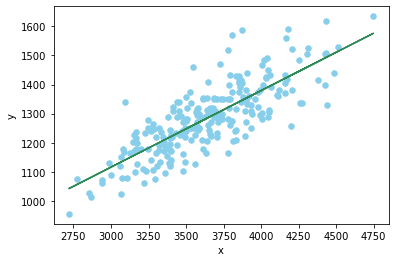

In [35]:
plot_regression_line(X, Y, b)

In [36]:
def rmse(y, y_pred):
    rmse = np.sqrt(sum((y - y_pred)**2)/len(y))
    return rmse

In [37]:
y_pred = b[0] + b[1]*X
rmse(Y, y_pred)

72.1206213783709

In [38]:
def r2_score(y, y_pred):
    mean_y = np.mean(y)
    ss_tot = sum((y - mean_y)**2)
    ss_res = sum((y - y_pred)**2)
    r2 = 1 - (ss_res/ss_tot)
    return r2

In [39]:
r2_score(Y, y_pred)

0.6393117199570004